In [2]:
import pandas as pd
import matplotlib as plt
import sqlite3
import os
import seaborn as sns

In [3]:
#retriing table names from data frame
im_path = r"C:\Users\HP\Desktop\moringa\PHASE1_PROJECT\im.db\im.db"

conn = sqlite3.connect(im_path)
cursor = conn.cursor()

table_name_query = """ SELECT name
                       AS 'Table Names' 
                       FROM sqlite_master 
                       WHERE type='table';
                       """

table_names = pd.read_sql(table_name_query, conn)

print(table_names)

     Table Names
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [4]:
q = """SELECT *
       FROM directors;
    """
df = pd.read_sql(q, conn)

print(df.head())

    movie_id  person_id
0  tt0285252  nm0899854
1  tt0462036  nm1940585
2  tt0835418  nm0151540
3  tt0835418  nm0151540
4  tt0878654  nm0089502


In [5]:
# marging the movie mudgets in csv file and  cleaning them up
budget_one = pd.read_csv("C:\\Users\\HP\\Desktop\\moringa\\PHASE1_PROJECT\\tn.movie_budgets.csv\\tn.movie_budgets.csv")
budget_two = pd.read_csv("C:\\Users\\HP\\Desktop\\moringa\\PHASE1_PROJECT\\bom.movie_gross.csv\\bom.movie_gross.csv")


In [6]:
budget_one.head()
budget_one.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [7]:
print(budget_one.columns)

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')


In [8]:
budget_one

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [9]:
print(budget_two.columns)

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


In [10]:
budget_two.drop(columns=["studio", "year"], inplace=True)
budget_two

,title,domestic_gross,foreign_gross
0,Toy Story 3,415000000.0,652000000
1,Alice in Wonderland (2010),334200000.0,691300000
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000
3,Inception,292600000.0,535700000
4,Shrek Forever After,238700000.0,513900000
...,...,...,...
3382,The Quake,6200.0,NaN
3383,Edward II (2018 re-release),4800.0,NaN
3384,El Pacto,2500.0,NaN
3385,The Swan,2400.0,NaN


In [11]:
budget_two.columns = ['movie', 'domestic_gross', 'worldwide_gross']

# Print the updated DataFrame
print(budget_two)

                                            movie  domestic_gross  \
0                                     Toy Story 3     415000000.0   
1                      Alice in Wonderland (2010)     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1     296000000.0   
3                                       Inception     292600000.0   
4                             Shrek Forever After     238700000.0   
...                                           ...             ...   
3382                                    The Quake          6200.0   
3383                  Edward II (2018 re-release)          4800.0   
3384                                     El Pacto          2500.0   
3385                                     The Swan          2400.0   
3386                            An Actor Prepares          1700.0   

     worldwide_gross  
0          652000000  
1          691300000  
2          664300000  
3          535700000  
4          513900000  
...              ...  
3382      

In [12]:
merged_revenue=pd.concat([budget_one, budget_two])
merged_revenue

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1.0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3.0,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4.0,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5.0,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
3382,NaN,NaN,The Quake,NaN,6200.0,NaN
3383,NaN,NaN,Edward II (2018 re-release),NaN,4800.0,NaN
3384,NaN,NaN,El Pacto,NaN,2500.0,NaN
3385,NaN,NaN,The Swan,NaN,2400.0,NaN


In [13]:
merged_revenue.drop_duplicates()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1.0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3.0,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4.0,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5.0,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
3382,NaN,NaN,The Quake,NaN,6200.0,NaN
3383,NaN,NaN,Edward II (2018 re-release),NaN,4800.0,NaN
3384,NaN,NaN,El Pacto,NaN,2500.0,NaN
3385,NaN,NaN,The Swan,NaN,2400.0,NaN


In [14]:
merged_revenue['domestic_gross'] = pd.to_numeric(merged_revenue['domestic_gross'], errors='coerce')


In [15]:
merged_revenue['domestic_gross'].mean()

28745845.06698422

In [16]:
median_value=merged_revenue['domestic_gross'].median()
median_value

1400000.0

In [17]:
merged_revenue['domestic_gross'].max()

936700000.0

In [18]:
merged_revenue['domestic_gross'].describe()

count    3.359000e+03
mean     2.874585e+07
std      6.698250e+07
min      1.000000e+02
25%      1.200000e+05
50%      1.400000e+06
75%      2.790000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

In [19]:
merged_revenue['domestic_gross'] = merged_revenue['domestic_gross'].fillna(median_value)

In [20]:
merged_revenue['worldwide_gross'].describe()

count     7819
unique    6560
top         $0
freq       367
Name: worldwide_gross, dtype: object

In [21]:
# im trying to remove the /$ signs 
merged_revenue['worldwide_gross'] = pd.to_numeric(merged_revenue['worldwide_gross'].replace('[\$,]', '', regex=True), errors='coerce')


In [22]:
median=merged_revenue['worldwide_gross'].median()

In [23]:
merged_revenue['worldwide_gross'] = merged_revenue['worldwide_gross'].fillna(median)

In [24]:
merged_revenue['worldwide_gross'].describe()

count    9.169000e+03
mean     7.804658e+07
std      1.548185e+08
min      0.000000e+00
25%      6.100000e+06
50%      2.526868e+07
75%      7.278517e+07
max      2.776345e+09
Name: worldwide_gross, dtype: float64

In [25]:
m1 = pd.read_csv("C:\\Users\\HP\\Desktop\\moringa\\PHASE1_PROJECT\\tn.movie_budgets.csv\\tn.movie_budgets.csv")
m1

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [26]:

production_budget = m1['production_budget']

production_budget = pd.to_numeric(production_budget.replace('[\$,]', '', regex=True), errors='coerce')
production_budget

0       425000000
1       410600000
2       350000000
3       330600000
4       317000000
          ...    
5777         7000
5778         6000
5779         5000
5780         1400
5781         1100
Name: production_budget, Length: 5782, dtype: int64

In [27]:
Release_year = m1['release_date']
Release_year

0       Dec 18, 2009
1       May 20, 2011
2        Jun 7, 2019
3        May 1, 2015
4       Dec 15, 2017
            ...     
5777    Dec 31, 2018
5778     Apr 2, 1999
5779    Jul 13, 2005
5780    Sep 29, 2015
5781     Aug 5, 2005
Name: release_date, Length: 5782, dtype: object

In [28]:
merged_revenue['Release_year'] = Release_year

In [29]:
production_budget.describe()

count    5.782000e+03
mean     3.158776e+07
std      4.181208e+07
min      1.100000e+03
25%      5.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

In [30]:
merged_revenue
pd.set_option('display.float_format', '{:.2f}'.format)
merged_revenue

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Release_year
0,1.00,"Dec 18, 2009",Avatar,"$425,000,000",1400000.00,2776345279.00,"Dec 18, 2009"
1,2.00,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000",1400000.00,1045663875.00,"May 20, 2011"
2,3.00,"Jun 7, 2019",Dark Phoenix,"$350,000,000",1400000.00,149762350.00,"Jun 7, 2019"
3,4.00,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000",1400000.00,1403013963.00,"May 1, 2015"
4,5.00,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000",1400000.00,1316721747.00,"Dec 15, 2017"
...,...,...,...,...,...,...,...
3382,NaN,NaN,The Quake,NaN,6200.00,25268680.00,"Jun 15, 1979"
3383,NaN,NaN,Edward II (2018 re-release),NaN,4800.00,25268680.00,"Jan 30, 2015"
3384,NaN,NaN,El Pacto,NaN,2500.00,25268680.00,"May 14, 2010"
3385,NaN,NaN,The Swan,NaN,2400.00,25268680.00,"Sep 10, 1999"


In [31]:
merged_revenue['production_budget'] = production_budget
merged_revenue

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Release_year
0,1.00,"Dec 18, 2009",Avatar,425000000,1400000.00,2776345279.00,"Dec 18, 2009"
1,2.00,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,1400000.00,1045663875.00,"May 20, 2011"
2,3.00,"Jun 7, 2019",Dark Phoenix,350000000,1400000.00,149762350.00,"Jun 7, 2019"
3,4.00,"May 1, 2015",Avengers: Age of Ultron,330600000,1400000.00,1403013963.00,"May 1, 2015"
4,5.00,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,1400000.00,1316721747.00,"Dec 15, 2017"
...,...,...,...,...,...,...,...
3382,NaN,NaN,The Quake,12000000,6200.00,25268680.00,"Jun 15, 1979"
3383,NaN,NaN,Edward II (2018 re-release),12000000,4800.00,25268680.00,"Jan 30, 2015"
3384,NaN,NaN,El Pacto,12000000,2500.00,25268680.00,"May 14, 2010"
3385,NaN,NaN,The Swan,12000000,2400.00,25268680.00,"Sep 10, 1999"


In [32]:
merged_revenue['production_budget'].describe()

count        9169.00
mean     38672786.36
std      44260385.86
min          1100.00
25%      11000000.00
50%      25000000.00
75%      50000000.00
max     425000000.00
Name: production_budget, dtype: float64

In [33]:
merged_revenue['production_budget'] = pd.to_numeric(merged_revenue['production_budget'].replace('[\$,]', '', regex=True), errors='coerce')

In [34]:
median_production=merged_revenue['production_budget'].median()

In [35]:
merged_revenue['production_budget'] = merged_revenue['production_budget'].fillna(median_production)

In [36]:
merged_revenue['Total_revenue'] = merged_revenue['domestic_gross'] + merged_revenue['worldwide_gross']
merged_revenue['Total_revenue'] 

0      2777745279.00
1      1047063875.00
2       151162350.00
3      1404413963.00
4      1318121747.00
            ...     
3382     25274880.00
3383     25273480.00
3384     25271180.00
3385     25271080.00
3386     25270380.00
Name: Total_revenue, Length: 9169, dtype: float64

In [37]:
merged_revenue['ROI'] = ((merged_revenue['Total_revenue'] - merged_revenue['production_budget']) / merged_revenue['production_budget']) * 100
merged_revenue['ROI']

0      553.59
1      155.01
2      -56.81
3      324.81
4      315.81
        ...  
3382   110.62
3383   110.61
3384   110.59
3385   110.59
3386   110.59
Name: ROI, Length: 9169, dtype: float64

In [38]:
merged_revenue['domestic_gross'] = merged_revenue['domestic_gross'].round().astype(int)

merged_revenue['worldwide_gross'] = merged_revenue['worldwide_gross'].round().astype(int)

In [39]:
merged_revenue

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Release_year,Total_revenue,ROI
0,1.00,"Dec 18, 2009",Avatar,425000000,1400000,-2147483648,"Dec 18, 2009",2777745279.00,553.59
1,2.00,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,1400000,1045663875,"May 20, 2011",1047063875.00,155.01
2,3.00,"Jun 7, 2019",Dark Phoenix,350000000,1400000,149762350,"Jun 7, 2019",151162350.00,-56.81
3,4.00,"May 1, 2015",Avengers: Age of Ultron,330600000,1400000,1403013963,"May 1, 2015",1404413963.00,324.81
4,5.00,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,1400000,1316721747,"Dec 15, 2017",1318121747.00,315.81
...,...,...,...,...,...,...,...,...,...
3382,NaN,NaN,The Quake,12000000,6200,25268680,"Jun 15, 1979",25274880.00,110.62
3383,NaN,NaN,Edward II (2018 re-release),12000000,4800,25268680,"Jan 30, 2015",25273480.00,110.61
3384,NaN,NaN,El Pacto,12000000,2500,25268680,"May 14, 2010",25271180.00,110.59
3385,NaN,NaN,The Swan,12000000,2400,25268680,"Sep 10, 1999",25271080.00,110.59


In [40]:
import matplotlib.pyplot as plt

# Check if 'figure' is overwritten
print(plt.figure)

<function figure at 0x0000020C3549E560>


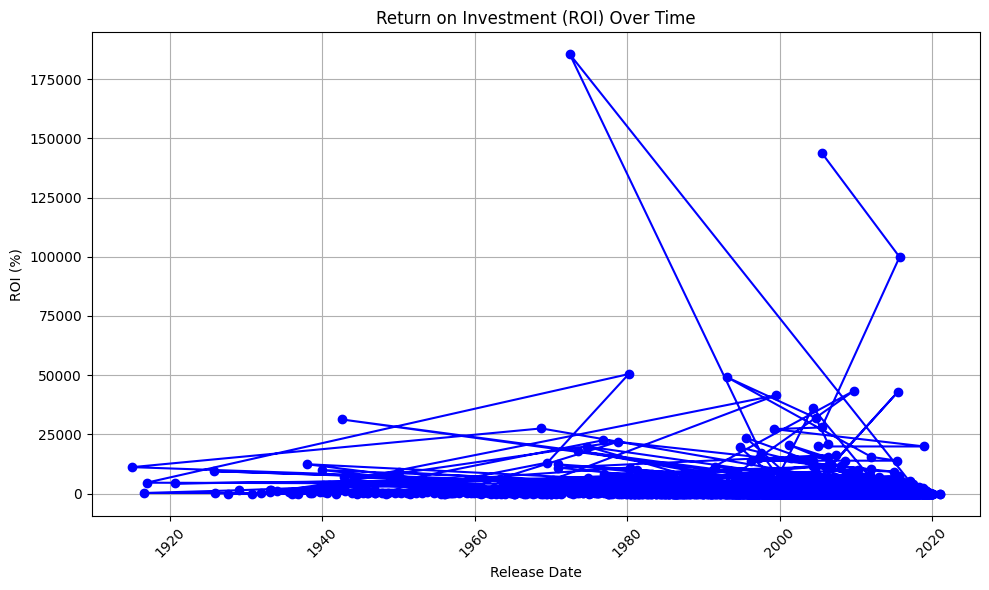

In [41]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

merged_revenue['release_date'] = pd.to_datetime(merged_revenue['release_date'], errors='coerce')

plt.figure(figsize=(10, 6))
plt.plot(merged_revenue['release_date'], merged_revenue['ROI'], marker='o', linestyle='-', color='b')
plt.title('Return on Investment (ROI) Over Time')
plt.xlabel('Release Date')
plt.ylabel('ROI (%)')
plt.grid(True)
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


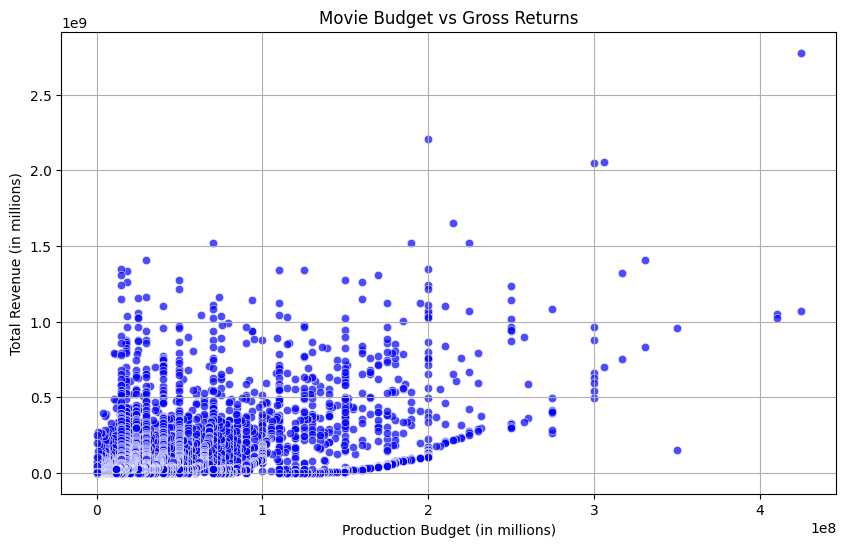

In [42]:
# trying to figure out the corelationship between movie budget and total revenue returns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='Total_revenue', data=merged_revenue, color='blue', alpha=0.7)
plt.title('Movie Budget vs Gross Returns')
plt.xlabel('Production Budget (in millions)')
plt.ylabel('Total Revenue (in millions)')
plt.grid(True)
plt.show()

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


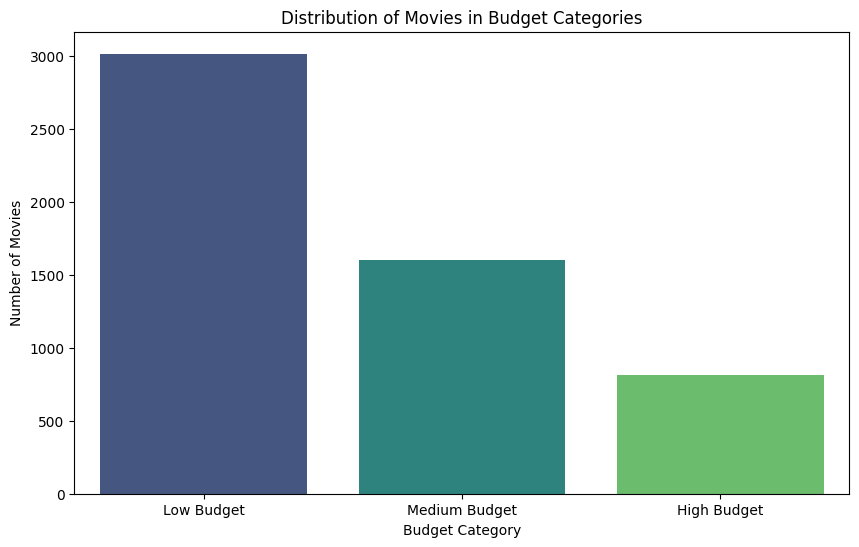

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


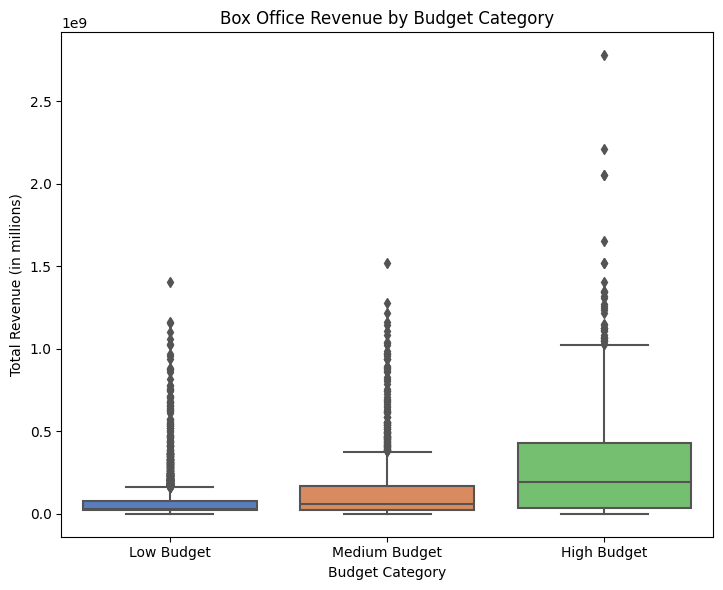

In [43]:
#  budget categories by definations
budget_bins = [20000000, 50000000, 100000000, float('inf')]  
budget_labels = ['Low Budget', 'Medium Budget', 'High Budget']

# Created a new column 'Budget_Category' based on budget ranges
merged_revenue['Budget_Category'] = pd.cut(merged_revenue['production_budget'], bins=budget_bins, labels=budget_labels, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(x='Budget_Category', data=merged_revenue, palette='viridis')
plt.title('Distribution of Movies in Budget Categories')
plt.xlabel('Budget Category')
plt.ylabel('Number of Movies')
plt.show()

# analysis on revenue and reviews by budget category
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Budget_Category', y='Total_revenue', data=merged_revenue, palette='muted')
plt.title('Box Office Revenue by Budget Category')
plt.xlabel('Budget Category')
plt.ylabel('Total Revenue (in millions)')

plt.tight_layout()
plt.show()

In [44]:
top_gross_return = merged_revenue.sort_values(by='Total_revenue', ascending=False).head(10)
top_gross_return 


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Release_year,Total_revenue,ROI,Budget_Category
0,1.00,2009-12-18,Avatar,425000000,1400000,-2147483648,"Dec 18, 2009",2777745279.00,553.59,High Budget
42,43.00,1997-12-19,Titanic,200000000,1400000,-2147483648,"Dec 19, 1997",2209608395.00,1004.80,High Budget
5,6.00,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,1400000,2053311220,"Dec 18, 2015",2054711220.00,571.47,High Budget
6,7.00,2018-04-27,Avengers: Infinity War,300000000,1400000,2048134200,"Apr 27, 2018",2049534200.00,583.18,High Budget
33,34.00,2015-06-12,Jurassic World,215000000,1400000,1648854864,"Jun 12, 2015",1650254864.00,667.56,High Budget
66,67.00,2015-04-03,Furious 7,190000000,1400000,1518722794,"Apr 3, 2015",1520122794.00,700.06,High Budget
26,27.00,2012-05-04,The Avengers,225000000,1400000,1517935897,"May 4, 2012",1519335897.00,575.26,High Budget
727,NaN,NaT,Marvel's The Avengers,70000000,623400000,895500000,"Aug 10, 2007",1518900000.00,2069.86,Medium Budget
1875,NaN,NaT,Avengers: Age of Ultron,30000000,459000000,946400000,"Apr 18, 2008",1405400000.00,4584.67,Low Budget
3,4.00,2015-05-01,Avengers: Age of Ultron,330600000,1400000,1403013963,"May 1, 2015",1404413963.00,324.81,High Budget


In [45]:
low_gross_return = merged_revenue.sort_values(by='Total_revenue', ascending=False).tail(10)
low_gross_return

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Release_year,Total_revenue,ROI,Budget_Category
1835,NaN,NaT,Policeman,30000000,11300,27000,"Jun 8, 1984",38300.00,-99.87,Low Budget
318,NaN,NaT,Daddy Longlegs,110000000,21800,11500,"May 29, 2015",33300.00,-99.97,High Budget
705,NaN,NaT,Brotherhood (2011),70000000,19700,12700,"Nov 19, 1999",32400.00,-99.95,Medium Budget
320,NaN,NaT,Nenette,110000000,18000,5400,"Jun 27, 2007",23400.00,-99.98,High Budget
321,NaN,NaT,Picture Me,110000000,12000,10400,"Mar 20, 2015",22400.00,-99.98,High Budget
711,NaN,NaT,I'm Glad My Mother is Alive,70000000,8700,13200,"Dec 25, 2011",21900.00,-99.97,Medium Budget
322,NaN,NaT,The Thorn in the Heart,110000000,7400,10500,"Dec 10, 2004",17900.00,-99.98,High Budget
1110,NaN,NaT,Cirkus Columbia,50000000,3500,9500,"Jun 9, 1995",13000.00,-99.97,Medium Budget
715,NaN,NaT,Aurora,70000000,5700,5100,"Dec 11, 1998",10800.00,-99.98,Medium Budget
721,NaN,NaT,To Die Like a Man,70000000,4000,900,"Sep 29, 2006",4900.00,-99.99,Medium Budget


In [46]:
# correlation between production cost and revenue return
correlation_budget_revenue = merged_revenue['production_budget'].corr(merged_revenue['Total_revenue'])
correlation_budget_revenue

0.4830593182126858

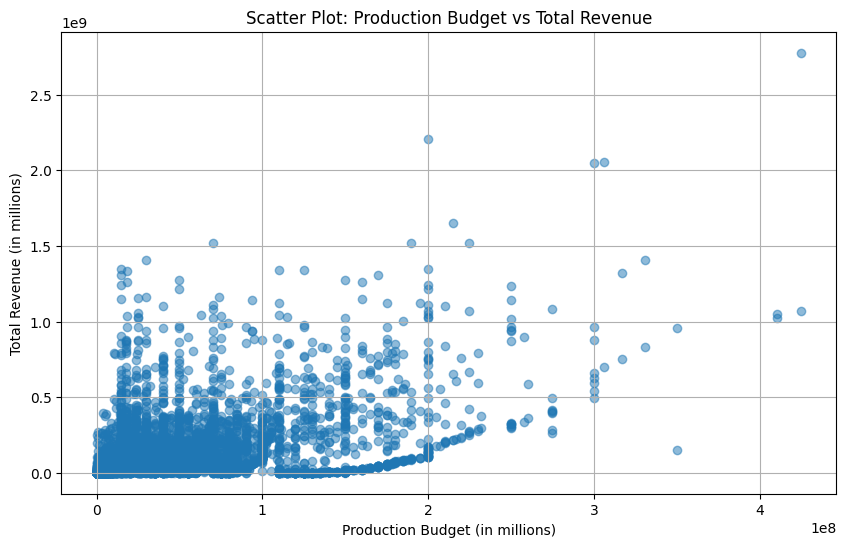

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_revenue['production_budget'], merged_revenue['Total_revenue'], alpha=0.5)
plt.title('Scatter Plot: Production Budget vs Total Revenue')
plt.xlabel('Production Budget (in millions)')
plt.ylabel('Total Revenue (in millions)')
plt.grid(True)
plt.show()

# positive correlation

In [ ]:
Basic_info = '''
                 SELECT * FROM movie_basics;
'''

cursor.execute(Basic_info)

rows = cursor.fetchall()

for row in rows:
    print(row)

In [ ]:
Movies_release = '''
                 SELECT start_year, COUNT(*) AS movie_count
                 FROM movie_basics
                 GROUP BY start_year
                 ORDER BY start_year;
'''
cursor.execute(Movies_release)

rows = cursor.fetchall()

for row in rows:
    print(row)

In [ ]:
# executing sql queries on im.db
audience_Ratings_above_avg=''' 
                 SELECT *
                 FROM movie_ratings
                 WHERE averagerating >= 7.0;              
'''
cursor.execute(audience_Ratings_above_avg)

rows = cursor.fetchall()

for row in rows:
    print(row)


In [ ]:
geners_above_avg = '''
                 SELECT genres, AVG(averagerating) AS avg_rating
                 FROM movie_basics
                 JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
                 GROUP BY genres
                 HAVING avg_rating > 7.0;
'''

cursor.execute(geners_above_avg)

rows = cursor.fetchall()

for row in rows:
    print(row)



In [ ]:
Proffesions = '''
                 SELECT primary_name, primary_profession
                 FROM persons;
'''

cursor.execute(Proffesions)

rows = cursor.fetchall()

for row in rows:
    print(row)

In [ ]:
recognised_by = '''
                 SELECT persons.primary_name, known_for.movie_id
                 FROM persons
                 LEFT JOIN known_for ON persons.person_id = known_for.person_id;
'''

cursor.execute(recognised_by)

rows = cursor.fetchall()

for row in rows:
        print(row)


In [ ]:
English_movies= '''
                  SELECT title, region, language
                 FROM movie_akas
                 WHERE language = "en";
'''

cursor.execute(query)

rows = cursor.fetchall()

for row in rows:
     print(row)
 